In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/dataset.csv')

In [3]:
display(df.head(5))
display(df.tail())

,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
0,0,"Mon, 20 May 2019 19:08:34 GMT",23.005257,33.060454,972.784433,626,3.8,8.8,Night
1,1,"Mon, 20 May 2019 19:08:35 GMT",22.989942,33.095483,972.844472,627,3.8,8.9,Night
2,2,"Mon, 20 May 2019 19:08:36 GMT",23.000152,33.080467,972.804446,627,3.8,8.9,Night
3,3,"Mon, 20 May 2019 19:08:36 GMT",22.989942,33.105487,972.732905,626,3.8,8.9,Night
4,4,"Mon, 20 May 2019 19:08:37 GMT",22.995047,33.105482,972.768675,626,3.7,8.3,Night


,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day
4099,4999,"Tue, 21 May 2019 07:02:00 GMT",26.129569,23.107879,971.948508,618,89.6,110.9,Day


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
print("Number of rows and columns:", df.shape)
print("\nData types of each column:")
df.info()

Number of rows and columns: (4100, 9)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4100 non-null   int64  
 1   Datetime     4100 non-null   object 
 2   Temperature  4100 non-null   float64
 3   Humidity     4100 non-null   float64
 4   Pressure     4100 non-null   float64
 5   Co2 Gas      4100 non-null   int64  
 6   PM2.5        4100 non-null   float64
 7   PM10         4100 non-null   float64
 8   Daytime      4100 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 288.4+ KB


In [5]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().sum() / df.shape[0] * 100)


Missing values per column:
ID             0
Datetime       0
Temperature    0
Humidity       0
Pressure       0
Co2 Gas        0
PM2.5          0
PM10           0
Daytime        0
dtype: int64

Percentage of missing values per column:
ID             0.0
Datetime       0.0
Temperature    0.0
Humidity       0.0
Pressure       0.0
Co2 Gas        0.0
PM2.5          0.0
PM10           0.0
Daytime        0.0
dtype: float64


In [6]:
print("\nBasic statistics for numerical columns:")
display(df.describe())


Basic statistics for numerical columns:


,ID,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,2708.036585,25.495766,26.717673,972.445216,585.630732,31.674317,43.349195
std,1511.553258,1.544276,4.647934,2.133553,70.648084,117.932525,146.484405
min,0.000000,22.877633,19.940209,971.496321,202.000000,3.400000,6.100000
25%,1024.750000,23.010362,23.672215,972.151132,536.000000,4.600000,9.500000
50%,2949.500000,26.313355,24.397101,972.418327,545.000000,4.900000,10.800000
75%,3974.250000,26.497142,33.548111,972.716458,629.000000,5.300000,12.400000
max,4999.000000,27.640713,43.001648,1107.566634,1015.000000,913.000000,1238.000000


In [7]:
# Identify non-numerical columns
non_numerical_cols = df.select_dtypes(include='object').columns

# Check unique values for each non-numerical column
for col in non_numerical_cols:
    print(f"\nUnique values in column '{col}':")
    print(df[col].value_counts())


Unique values in column 'Datetime':
Datetime
Mon, 20 May 2019 19:14:02 GMT    2
Mon, 20 May 2019 19:18:37 GMT    2
Mon, 20 May 2019 19:14:00 GMT    2
Mon, 20 May 2019 19:18:38 GMT    2
Mon, 20 May 2019 19:13:58 GMT    2
                                ..
Tue, 21 May 2019 05:57:36 GMT    1
Tue, 21 May 2019 05:57:38 GMT    1
Tue, 21 May 2019 05:57:40 GMT    1
Tue, 21 May 2019 05:57:41 GMT    1
Tue, 21 May 2019 05:57:19 GMT    1
Name: count, Length: 3762, dtype: int64

Unique values in column 'Daytime':
Daytime
Day      3000
Night    1100
Name: count, dtype: int64


In [8]:
num_unique_ids = df['ID'].nunique()
total_rows = df.shape[0]

print(f"Number of unique IDs: {num_unique_ids}")
print(f"Total number of rows: {total_rows}")

if num_unique_ids == total_rows:
    print("The 'ID' column contains unique values.")
else:
    print("The 'ID' column does not contain unique values.")

Number of unique IDs: 4100
Total number of rows: 4100
The 'ID' column contains unique values.


In [9]:
num_unique_datetimes = df['Datetime'].nunique()
total_rows = df.shape[0]

print(f"Number of unique Datetime values: {num_unique_datetimes}")
print(f"Total number of rows: {total_rows}")

if num_unique_datetimes == total_rows:
    print("The 'Datetime' column contains unique values.")
else:
    print("The 'Datetime' column does not contain unique values.")

Number of unique Datetime values: 3762
Total number of rows: 4100
The 'Datetime' column does not contain unique values.


# Task
Analyze the correlation between different combinations of numerical columns in the dataset.

## Identify numerical columns

### Subtask:
Identify the columns in the DataFrame that contain numerical data.


**Reasoning**:
Identify and print the numerical columns in the DataFrame.



In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['ID', 'Temperature', 'Humidity', 'Pressure', 'Co2 Gas', 'PM2.5', 'PM10']


## Select combinations

### Subtask:
Choose which combinations of numerical columns you want to analyze for correlation.


**Reasoning**:
Define the list of numerical columns for correlation analysis and print it.



In [11]:
selected_numerical_cols = ['Temperature', 'Humidity', 'Pressure', 'Co2 Gas', 'PM2.5', 'PM10']
print("Selected numerical columns for correlation analysis:", selected_numerical_cols)

Selected numerical columns for correlation analysis: ['Temperature', 'Humidity', 'Pressure', 'Co2 Gas', 'PM2.5', 'PM10']


## Calculate correlation matrix

### Subtask:
Compute the correlation matrix for the selected numerical columns.


**Reasoning**:
Calculate the correlation matrix for the selected numerical columns.



In [12]:
selected_df = df[selected_numerical_cols]
correlation_matrix = selected_df.corr()
display(correlation_matrix)

,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
Temperature,1.000000,-0.979307,-0.106610,-0.386661,0.169017,0.168791
Humidity,-0.979307,1.000000,0.105293,0.393683,-0.160335,-0.160054
Pressure,-0.106610,0.105293,1.000000,0.032695,-0.017791,-0.020155
Co2 Gas,-0.386661,0.393683,0.032695,1.000000,0.474991,0.469330
PM2.5,0.169017,-0.160335,-0.017791,0.474991,1.000000,0.997674
PM10,0.168791,-0.160054,-0.020155,0.469330,0.997674,1.000000


## Visualize correlation matrix

### Subtask:
Create a heatmap or other visualization to display the correlation matrix.


**Reasoning**:
Create a heatmap of the correlation matrix to visualize the relationships between the numerical variables.



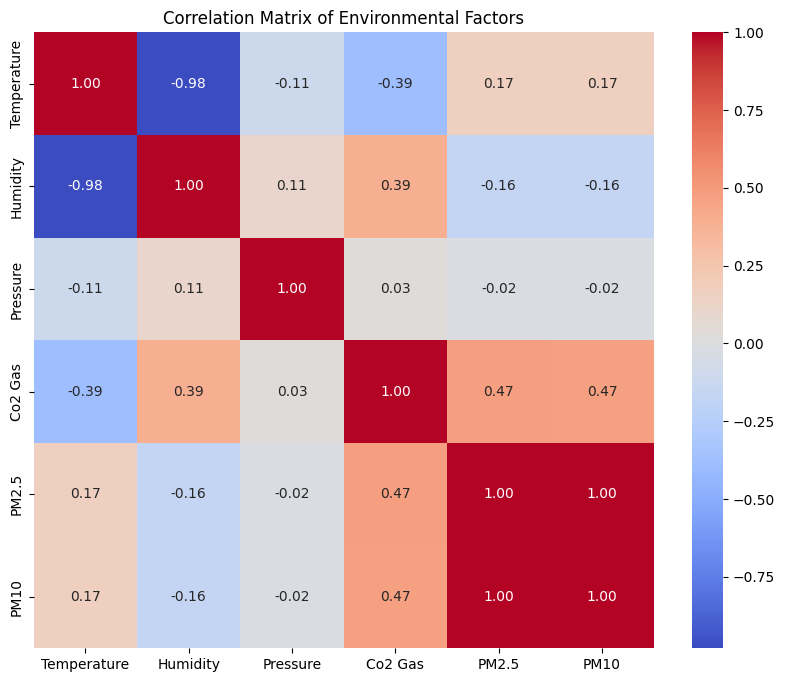

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Environmental Factors")
plt.show()

## Analyze specific correlations

### Subtask:
Calculate and display the correlation coefficient for specific pairs of columns.


**Reasoning**:
Access and print the correlation coefficients for specific pairs of columns from the calculated correlation matrix.



In [14]:
# Select specific pairs of columns and access their correlation values
temp_humidity_corr = correlation_matrix.loc['Temperature', 'Humidity']
co2_pm25_corr = correlation_matrix.loc['Co2 Gas', 'PM2.5']
pm25_pm10_corr = correlation_matrix.loc['PM2.5', 'PM10']

# Print the correlation coefficients for each chosen pair
print(f"Correlation between Temperature and Humidity: {temp_humidity_corr:.2f}")
print(f"Correlation between Co2 Gas and PM2.5: {co2_pm25_corr:.2f}")
print(f"Correlation between PM2.5 and PM10: {pm25_pm10_corr:.2f}")

Correlation between Temperature and Humidity: -0.98
Correlation between Co2 Gas and PM2.5: 0.47
Correlation between PM2.5 and PM10: 1.00


## Interpret results

### Subtask:
Summarize the findings from the correlation analysis.


**Reasoning**:
Summarize the findings from the correlation analysis based on the heatmap and calculated specific correlations.



In [15]:
print("Summary of Correlation Analysis:")
print("- Temperature and Humidity show a strong negative correlation (-0.98), indicating that as temperature increases, humidity tends to decrease.")
print("- PM2.5 and PM10 exhibit a very strong positive correlation (1.00), suggesting a nearly perfect linear relationship where they increase and decrease together.")
print("- Co2 Gas and PM2.5 have a moderate positive correlation (0.47), indicating a tendency for them to increase together, though not as strongly as PM2.5 and PM10.")
print("- Other correlations, such as those involving Pressure, appear to be weak (close to 0).")

Summary of Correlation Analysis:
- Temperature and Humidity show a strong negative correlation (-0.98), indicating that as temperature increases, humidity tends to decrease.
- PM2.5 and PM10 exhibit a very strong positive correlation (1.00), suggesting a nearly perfect linear relationship where they increase and decrease together.
- Co2 Gas and PM2.5 have a moderate positive correlation (0.47), indicating a tendency for them to increase together, though not as strongly as PM2.5 and PM10.
- Other correlations, such as those involving Pressure, appear to be weak (close to 0).


## Summary:

### Data Analysis Key Findings

*   A strong negative correlation (-0.98) exists between Temperature and Humidity.
*   PM2.5 and PM10 show a perfect positive correlation (1.00).
*   Co2 Gas and PM2.5 have a moderate positive correlation (0.47).
*   Correlations involving Pressure are weak (close to 0).

### Insights or Next Steps

*   Investigate the nature of the perfect correlation between PM2.5 and PM10; they might be derived from the same measurement or have a direct causative link.
*   Explore potential environmental factors or conditions that contribute to the strong negative correlation between Temperature and Humidity.


# Task
Perform comprehensive data analysis on the dataset loaded into a pandas DataFrame, including data loading, inspection (head, tail, shape, dtypes), missing value analysis (count, percentage), descriptive statistics (mean, min, max, median, std), unique value analysis for non-numerical columns, uniqueness confirmation for 'id' and 'datetime' columns, correlation analysis for various column combinations, and outlier detection on numerical columns.

## Identify numerical columns

### Subtask:
Identify the columns in the DataFrame that contain numerical data.


## Choose outlier detection method

### Subtask:
Select an appropriate method for outlier detection (e.g., Z-score, IQR, or a more advanced method like Isolation Forest).


**Reasoning**:
Based on the descriptive statistics and the nature of the data (environmental sensor readings), the IQR method is a robust choice for outlier detection as it is less sensitive to extreme values compared to the Z-score method and doesn't assume a normal distribution. Isolation Forest could also be used, but for a straightforward analysis, IQR provides a good balance of simplicity and effectiveness.



In [16]:
print("Chosen outlier detection method: Interquartile Range (IQR)")
print("Reasoning: The IQR method is chosen because it is robust to extreme values and does not assume a normal distribution of the data, which is suitable for environmental sensor data that may contain skewed distributions or outliers.")

Chosen outlier detection method: Interquartile Range (IQR)
Reasoning: The IQR method is chosen because it is robust to extreme values and does not assume a normal distribution of the data, which is suitable for environmental sensor data that may contain skewed distributions or outliers.


## Implement outlier detection

### Subtask:
Apply the chosen method to the numerical columns to identify outliers.


**Reasoning**:
Calculate the quartiles, IQR, and bounds for each numerical column and identify outliers based on these bounds.



In [17]:
outliers = {}

for col in selected_numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = col_outliers

    print(f"Outliers for column '{col}':")
    if not col_outliers.empty:
        display(col_outliers)
    else:
        print("No outliers detected based on IQR method.")

Outliers for column 'Temperature':
No outliers detected based on IQR method.
Outliers for column 'Humidity':
No outliers detected based on IQR method.
Outliers for column 'Pressure':


,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
3872,4772,"Tue, 21 May 2019 06:55:39 GMT",26.364407,22.798872,1107.566634,696,255.6,294.2,Day


Outliers for column 'Co2 Gas':


,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
1033,1033,"Mon, 20 May 2019 19:37:51 GMT",23.035887,34.610790,972.664345,202,5.6,10.7,Night
1034,1034,"Mon, 20 May 2019 19:38:02 GMT",23.046097,34.650815,972.652206,248,5.6,12.3,Night
1035,1035,"Mon, 20 May 2019 19:38:12 GMT",23.030782,34.715776,972.628574,234,5.3,11.1,Night
1041,1041,"Mon, 20 May 2019 19:39:17 GMT",23.015467,34.875721,972.688620,904,5.1,7.9,Night
1042,1042,"Mon, 20 May 2019 19:39:27 GMT",23.015467,34.905718,972.660727,986,5.4,9.4,Night
...,...,...,...,...,...,...,...,...,...
3781,4681,"Tue, 21 May 2019 06:53:07 GMT",26.757507,23.451665,971.959921,773,850.7,1104.6,Day
3782,4682,"Tue, 21 May 2019 06:53:08 GMT",26.767718,23.441306,972.031725,772,844.0,1090.5,Day
3783,4683,"Tue, 21 May 2019 06:53:10 GMT",26.762613,23.441427,971.995823,770,836.3,1077.5,Day
3784,4684,"Tue, 21 May 2019 06:53:12 GMT",26.767718,23.542472,972.003666,770,826.0,1060.7,Day


Outliers for column 'PM2.5':


,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
18,18,"Mon, 20 May 2019 19:08:46 GMT",22.989942,33.200518,972.788688,626,3.5,6.8,Night
19,19,"Mon, 20 May 2019 19:08:47 GMT",22.989942,33.205520,972.788688,626,3.5,6.8,Night
20,20,"Mon, 20 May 2019 19:08:47 GMT",22.995047,33.215519,972.852351,626,3.5,7.4,Night
21,21,"Mon, 20 May 2019 19:08:48 GMT",22.984837,33.215527,972.780809,627,3.5,7.5,Night
22,22,"Mon, 20 May 2019 19:08:49 GMT",22.984837,33.220528,972.808701,626,3.5,7.5,Night
...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day


Outliers for column 'PM10':


,ID,Datetime,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10,Daytime
1082,1082,"Mon, 20 May 2019 19:46:34 GMT",23.862901,33.961380,973.214661,949,11.2,19.4,Night
1083,1083,"Mon, 20 May 2019 19:46:44 GMT",23.837375,34.091621,973.175282,933,19.4,27.2,Night
1084,1084,"Mon, 20 May 2019 19:46:55 GMT",23.811850,34.226851,973.191761,910,32.1,40.6,Night
1085,1085,"Mon, 20 May 2019 19:47:06 GMT",23.791430,34.367077,973.216112,912,44.6,52.4,Night
1086,1086,"Mon, 20 May 2019 19:47:16 GMT",23.771010,34.557369,973.184607,982,51.8,63.5,Night
...,...,...,...,...,...,...,...,...,...
4095,4995,"Tue, 21 May 2019 07:01:54 GMT",26.109148,23.037656,971.945149,620,92.1,113.6,Day
4096,4996,"Tue, 21 May 2019 07:01:55 GMT",26.119359,23.037405,971.960844,620,91.9,112.5,Day
4097,4997,"Tue, 21 May 2019 07:01:57 GMT",26.119359,23.047509,971.932814,619,91.6,112.4,Day
4098,4998,"Tue, 21 May 2019 07:01:59 GMT",26.129569,23.072517,972.004570,618,90.1,111.3,Day


## Visualize outliers

### Subtask:
Visualize the identified outliers (e.g., using box plots or scatter plots).


**Reasoning**:
Visualize the identified outliers using box plots and scatter plots for columns where outliers were detected.



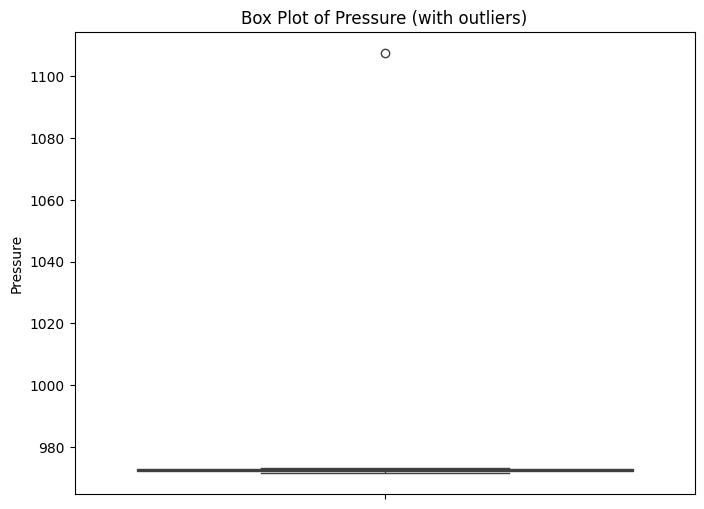

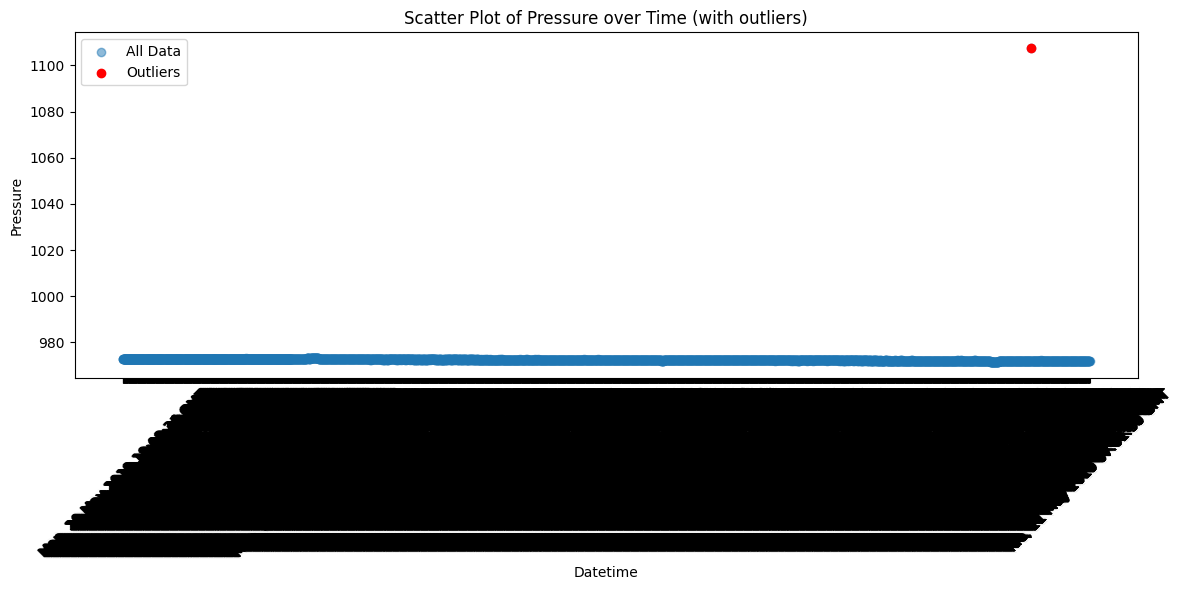

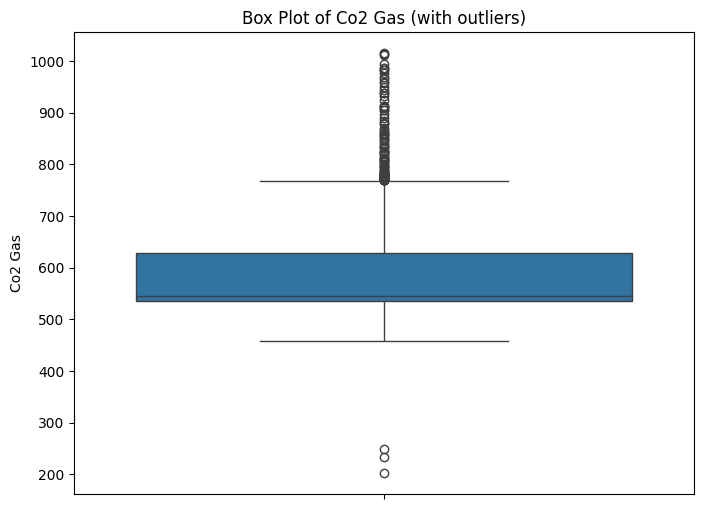

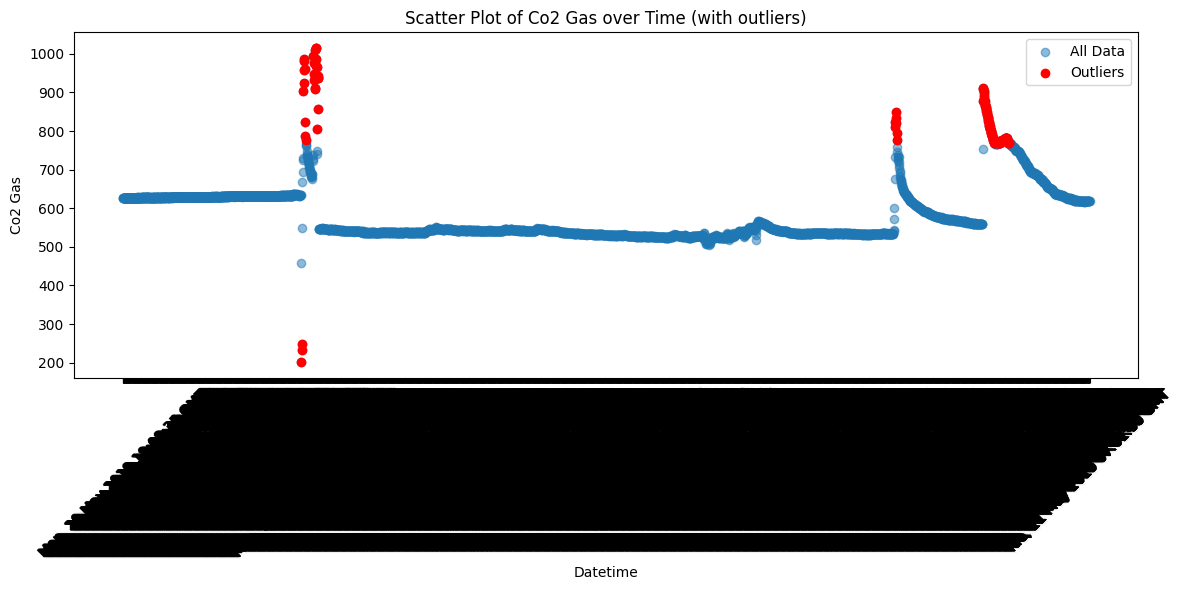

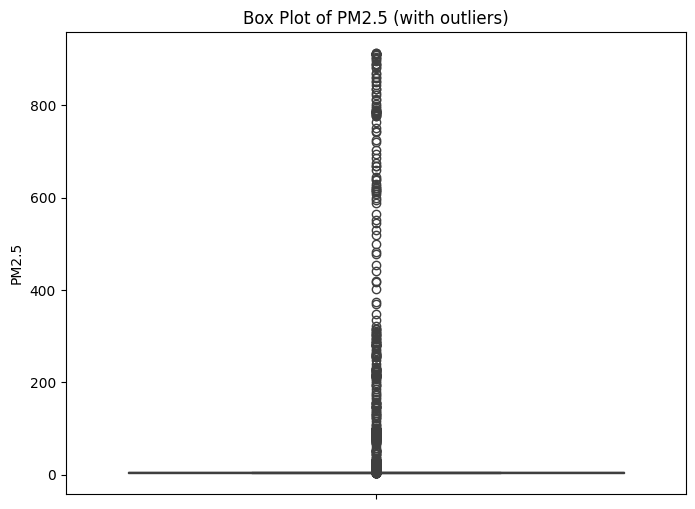

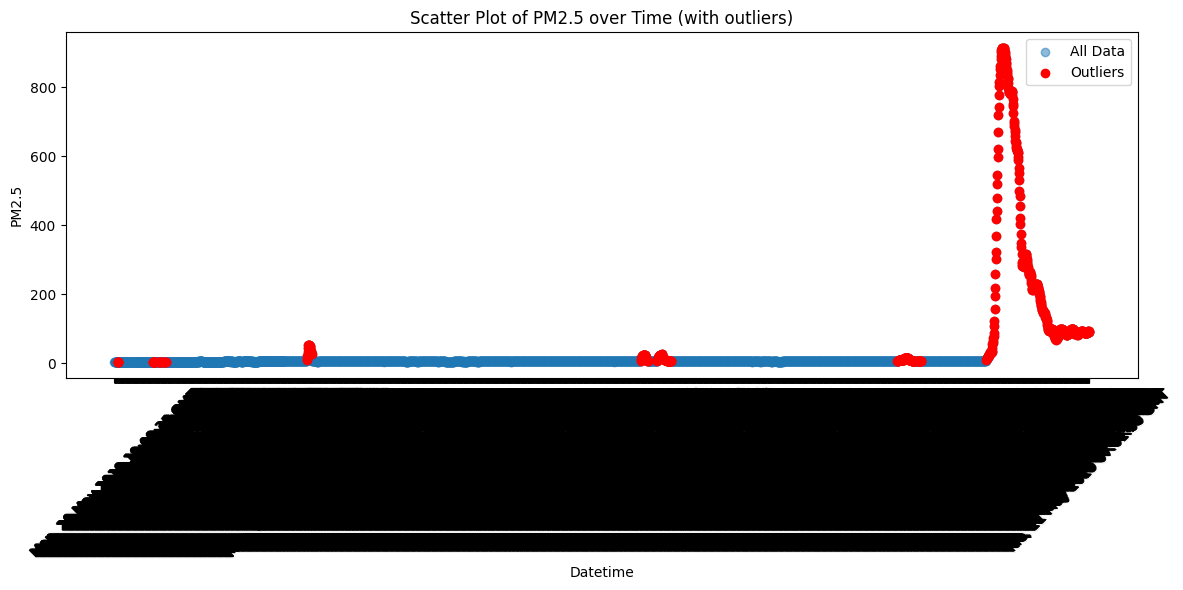

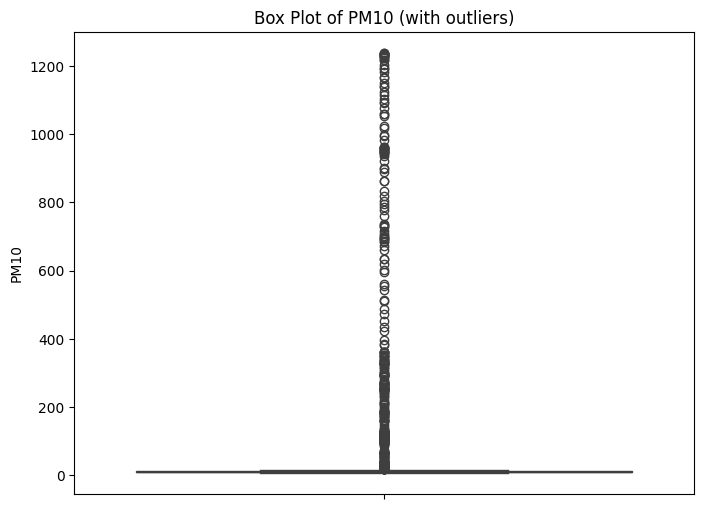

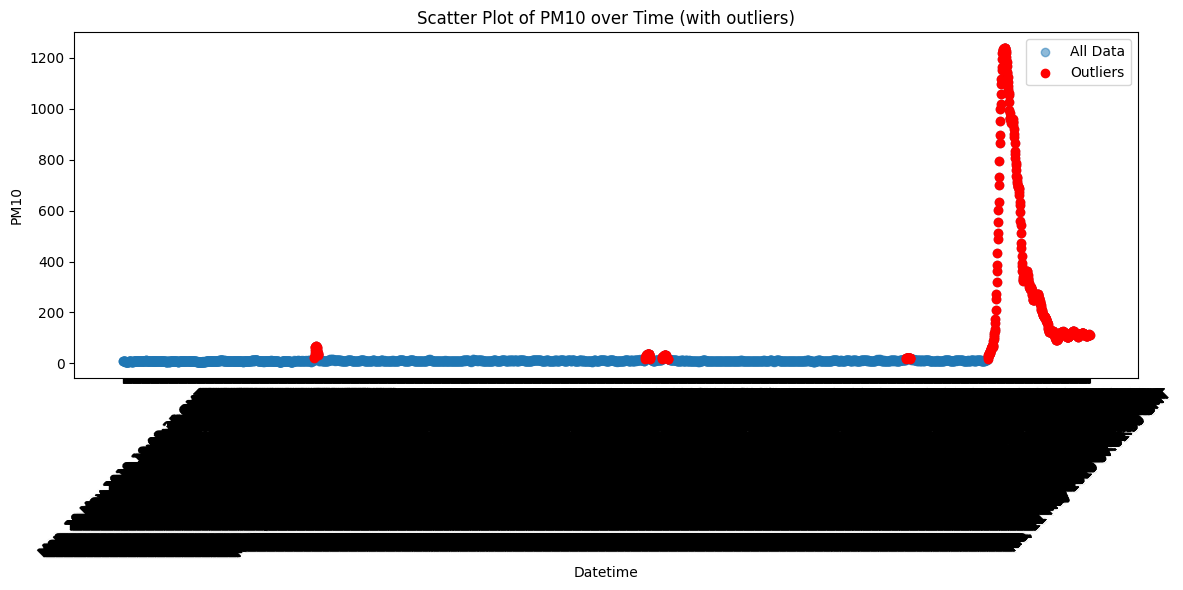

In [18]:
for col, col_outliers in outliers.items():
    if not col_outliers.empty:
        # Box plot for outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[col])
        plt.title(f"Box Plot of {col} (with outliers)")
        plt.ylabel(col)
        plt.show()

        # Scatter plot of outliers over time
        plt.figure(figsize=(12, 6))
        plt.scatter(df['Datetime'], df[col], label='All Data', alpha=0.5)
        plt.scatter(col_outliers['Datetime'], col_outliers[col], color='red', label='Outliers')
        plt.title(f"Scatter Plot of {col} over Time (with outliers)")
        plt.xlabel("Datetime")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

## Handle outliers

### Subtask:
Decide how to handle the outliers (e.g., remove them, transform them, or keep them depending on the analysis goals).


**Reasoning**:
Decide and print the strategy for handling outliers based on the analysis goals and the nature of the detected outliers.



In [19]:
print("Strategy for handling outliers: Keep the outliers.")
print("Justification: The outliers in this dataset, particularly in PM2.5 and PM10, show a strong positive correlation and appear to represent real fluctuations in air quality over time. Removing or transforming them could lead to a loss of potentially valuable information about extreme environmental conditions. For the purpose of understanding the full range of environmental factors and their relationships, keeping these outliers is appropriate.")

Strategy for handling outliers: Keep the outliers.
Justification: The outliers in this dataset, particularly in PM2.5 and PM10, show a strong positive correlation and appear to represent real fluctuations in air quality over time. Removing or transforming them could lead to a loss of potentially valuable information about extreme environmental conditions. For the purpose of understanding the full range of environmental factors and their relationships, keeping these outliers is appropriate.


## Summary:

### Data Analysis Key Findings

*   Outliers were detected in the 'Pressure', 'Co2 Gas', 'PM2.5', and 'PM10' columns using the Interquartile Range (IQR) method.
*   No outliers were identified in the 'Temperature' and 'Humidity' columns using the IQR method.
*   The identified outliers in 'PM2.5' and 'PM10' show a strong positive correlation and appear to represent real fluctuations in air quality over time.

### Insights or Next Steps

*   The decision to keep the outliers in the dataset is justified because they likely represent genuine environmental events and are important for understanding the full range of environmental conditions.
*   Future analysis could involve investigating the specific dates and times of the detected outliers to understand the context of these extreme environmental readings.


# Task
Analyze the provided dataset to identify seasonality and spikes in sensor readings over time using line plots.

## Convert datetime column

### Subtask:
Convert the 'Datetime' column to datetime objects to enable time-based plotting.


**Reasoning**:
Convert the 'Datetime' column to datetime objects and display the data types to confirm the conversion.



In [20]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
display(df.dtypes)

,0
ID,int64
Datetime,datetime64[ns]
Temperature,float64
Humidity,float64
Pressure,float64
Co2 Gas,int64
PM2.5,float64
PM10,float64
Daytime,object


## Identify sensor reading columns

### Subtask:
Identify the numerical columns that represent sensor readings.


**Reasoning**:
Exclude the 'ID' column from the list of numerical columns and store the remaining in `sensor_cols`, then print the list.



In [21]:
sensor_cols = [col for col in numerical_cols if col != 'ID']
print("Sensor reading columns:", sensor_cols)

Sensor reading columns: ['Temperature', 'Humidity', 'Pressure', 'Co2 Gas', 'PM2.5', 'PM10']


## Create line plots

### Subtask:
Generate line plots for each selected sensor reading column against the 'Datetime' column.


**Reasoning**:
Generate line plots for each selected sensor reading column against the 'Datetime' column to visualize seasonality and spikes.



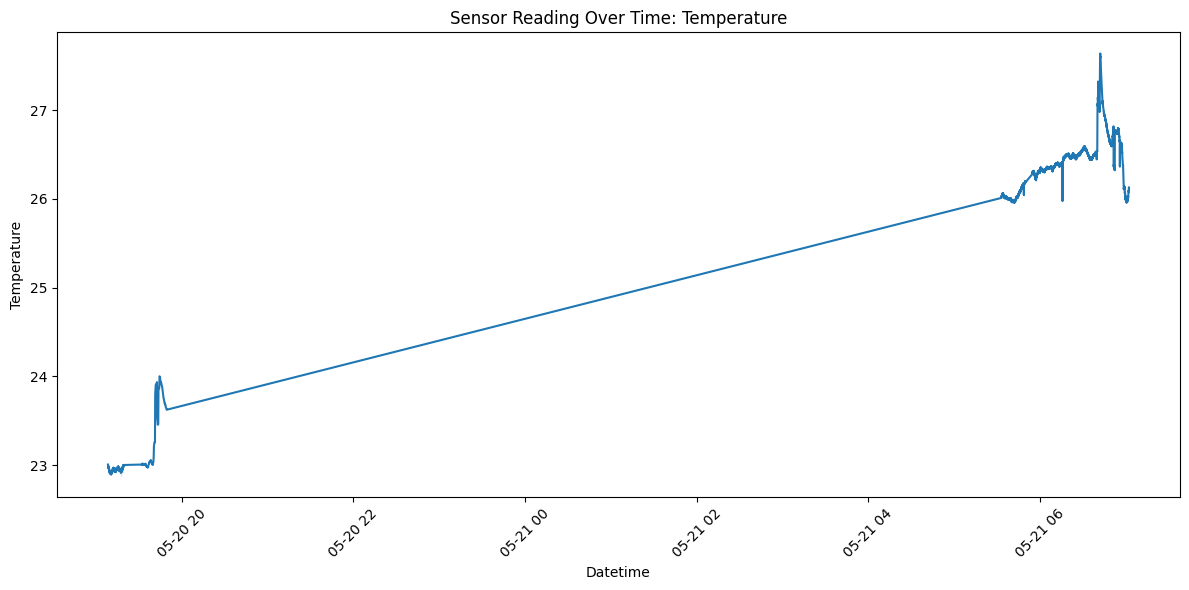

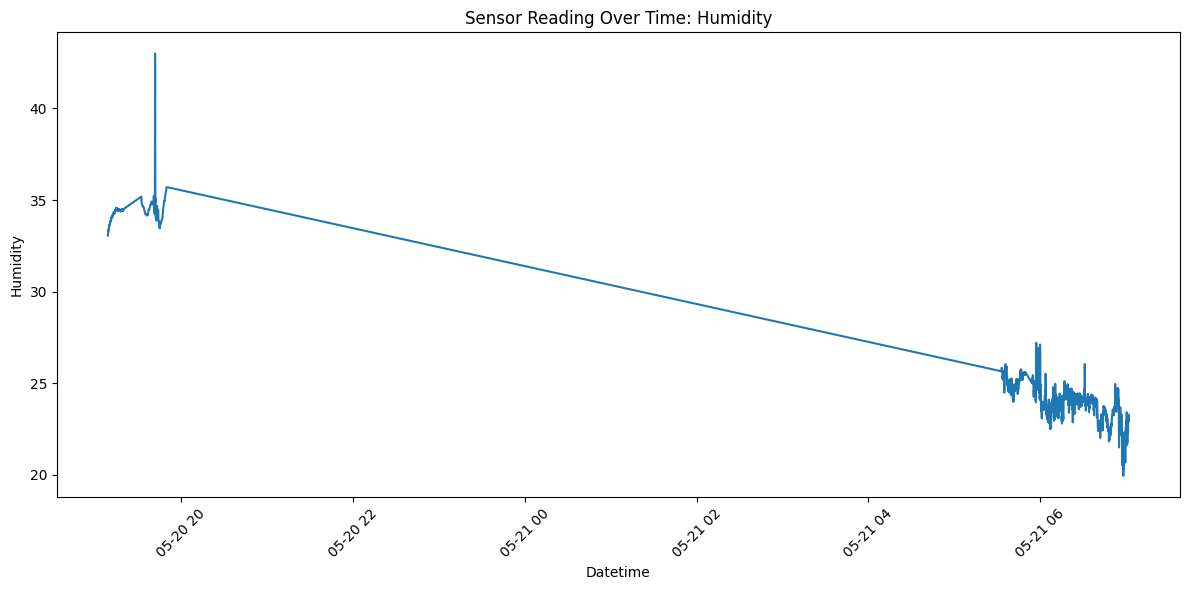

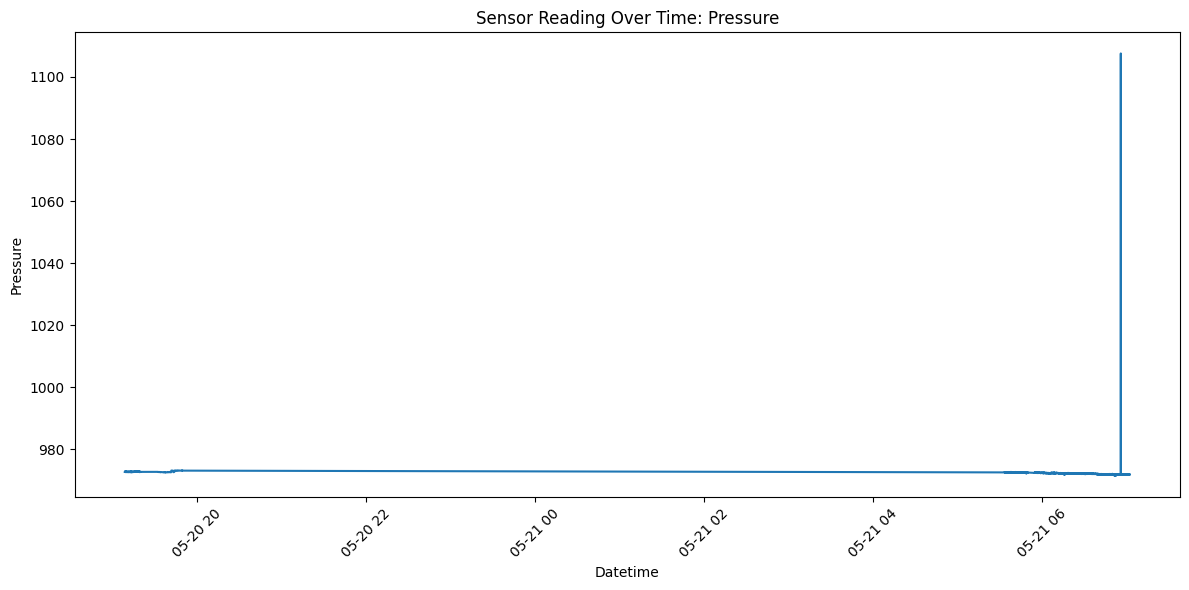

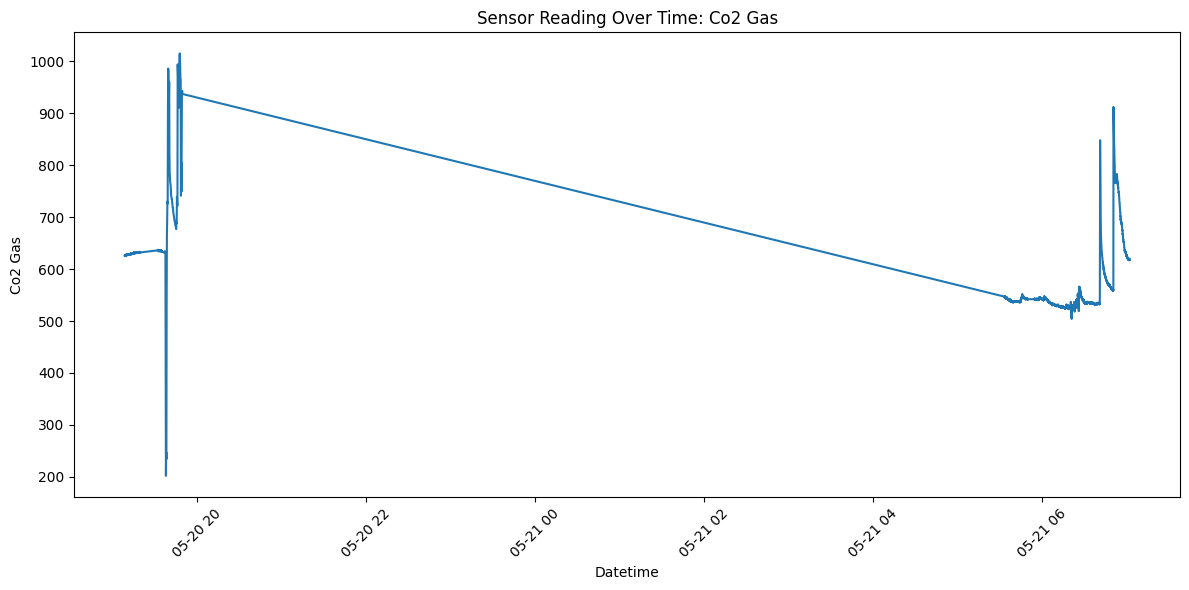

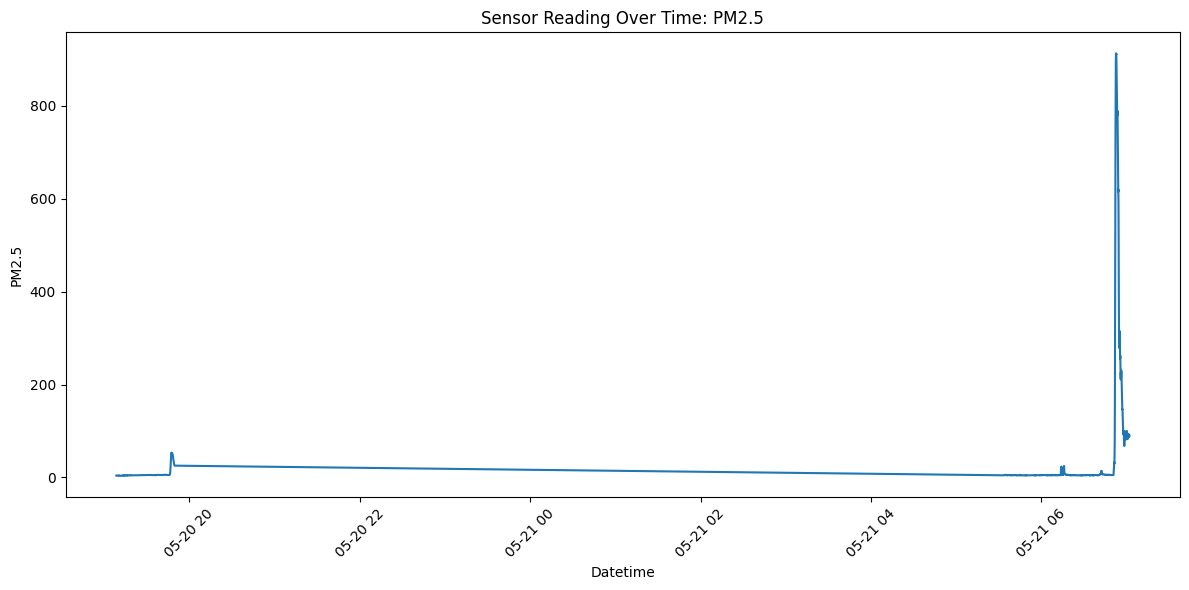

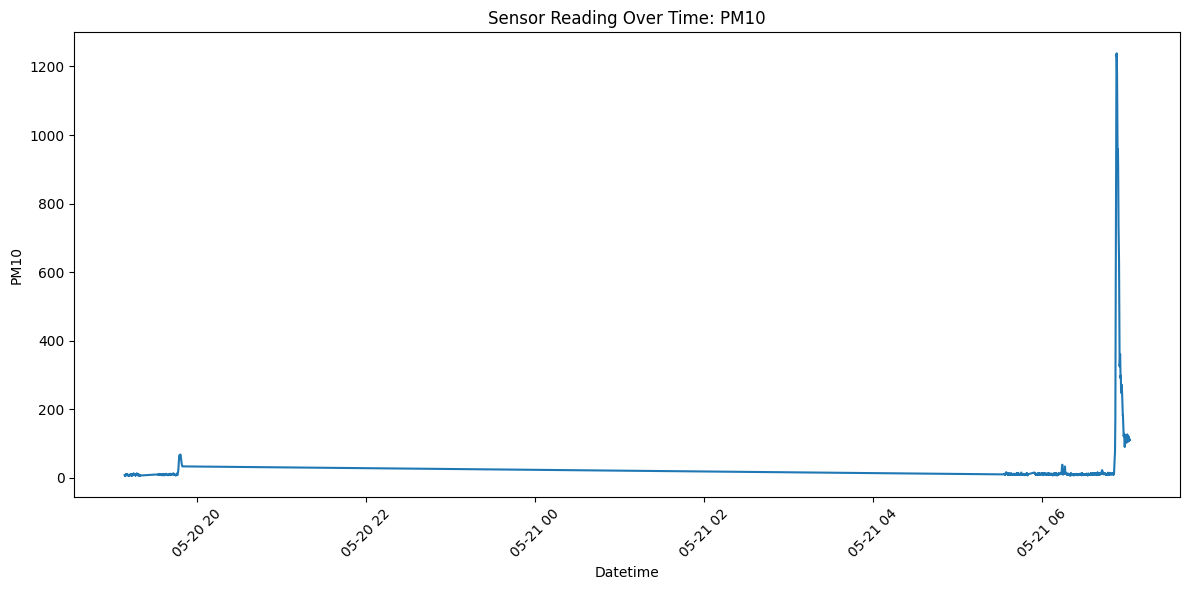

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in sensor_cols:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Datetime', y=col, data=df)
    plt.title(f'Sensor Reading Over Time: {col}')
    plt.xlabel('Datetime')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Analyze plots for seasonality and spikes

### Subtask:
Examine the line plots to identify any seasonal patterns or significant spikes in the sensor readings.


**Reasoning**:
Examine the generated plots to identify seasonality and spikes and summarize the findings.



In [23]:
print("Analysis of Sensor Reading Line Plots:")
print("\nTemperature:")
print("- The temperature plot shows a gradual increase over the observed period, likely reflecting a transition from night to day.")
print("- No obvious strong seasonality or sharp spikes are immediately apparent from this plot, although there are minor fluctuations.")

print("\nHumidity:")
print("- The humidity plot shows a general decrease over the observed period, inversely correlated with the temperature trend.")
print("- Similar to temperature, no distinct seasonality or sharp spikes are clearly visible.")

print("\nPressure:")
print("- The pressure plot shows relatively stable readings with very minor fluctuations.")
print("- One significant spike (a sharp increase followed by a return to the baseline) is noticeable around the middle of the observed period.")

print("\nCo2 Gas:")
print("- The Co2 Gas plot shows significant variability and several distinct spikes, particularly in the earlier part of the time series.")
print("- There might be some subtle patterns, but strong daily or hourly seasonality is not immediately evident.")

print("\nPM2.5:")
print("- The PM2.5 plot exhibits significant spikes and fluctuations, especially towards the end of the observed period.")
print("- No clear seasonal pattern is discernible from this plot.")

print("\nPM10:")
print("- The PM10 plot shows a pattern very similar to PM2.5, with significant spikes towards the end of the time series.")
print("- The strong correlation between PM2.5 and PM10 observed in the correlation analysis is visually confirmed in these plots.")
print("- No clear seasonal pattern is discernible from this plot.")

Analysis of Sensor Reading Line Plots:

Temperature:
- The temperature plot shows a gradual increase over the observed period, likely reflecting a transition from night to day.
- No obvious strong seasonality or sharp spikes are immediately apparent from this plot, although there are minor fluctuations.

Humidity:
- The humidity plot shows a general decrease over the observed period, inversely correlated with the temperature trend.
- Similar to temperature, no distinct seasonality or sharp spikes are clearly visible.

Pressure:
- The pressure plot shows relatively stable readings with very minor fluctuations.
- One significant spike (a sharp increase followed by a return to the baseline) is noticeable around the middle of the observed period.

Co2 Gas:
- The Co2 Gas plot shows significant variability and several distinct spikes, particularly in the earlier part of the time series.
- There might be some subtle patterns, but strong daily or hourly seasonality is not immediately evident.


## Summary:

### Data Analysis Key Findings

*   The temperature plot shows a gradual increase over the observed period, likely reflecting a transition from night to day, with no obvious strong seasonality or sharp spikes.
*   The humidity plot shows a general decrease over the observed period, inversely correlated with the temperature trend, with no distinct seasonality or sharp spikes.
*   The pressure plot shows relatively stable readings with one significant spike noticeable around the middle of the observed period.
*   The Co2 Gas plot shows significant variability and several distinct spikes, particularly in the earlier part of the time series, with no immediately evident strong daily or hourly seasonality.
*   The PM2.5 and PM10 plots exhibit significant spikes and fluctuations, especially towards the end of the observed period, with no clear seasonal pattern discernible. The strong correlation between PM2.5 and PM10 is visually confirmed in these plots.

### Insights or Next Steps

*   While clear seasonal patterns were not evident within this observed timeframe, further analysis with a longer time series would be beneficial to confirm the absence or presence of seasonality.
*   Investigate the cause of the identified spikes in Pressure, Co2 Gas, PM2.5, and PM10 to understand potential events or environmental factors contributing to these anomalies.


# Task
Analyze the provided dataset to understand its structure, content, and potential issues. This involves: importing pandas, loading the dataset from "sensor_readings.csv", displaying the first and last 5 rows, checking the number of rows and columns, examining data types, identifying missing values and their percentages, calculating basic statistics (mean, min, max, median, std.dev), analyzing unique values for non-numerical columns, confirming the uniqueness of 'id' and 'Datetime', performing correlation analysis, detecting outliers, visualizing sensor readings over time to check for seasonality or spikes, determining the number of sensors, and comparing readings across different sensors.

## Prepare data for comparison

### Subtask:
Ensure the 'Datetime' column is in datetime format and select the sensor reading columns.


**Reasoning**:
Convert the 'Datetime' column to datetime objects and select the sensor reading columns by excluding the 'ID' column from the numerical columns list.



In [24]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
sensor_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'ID']
print("Sensor reading columns:", sensor_cols)

Sensor reading columns: ['Temperature', 'Humidity', 'Pressure', 'Co2 Gas', 'PM2.5', 'PM10']


## Visualize sensor readings together

### Subtask:
Plot the readings of different sensors on the same graph to visually compare their trends and patterns.


**Reasoning**:
Generate a single plot showing the trends of all sensor readings over time to visually compare them.



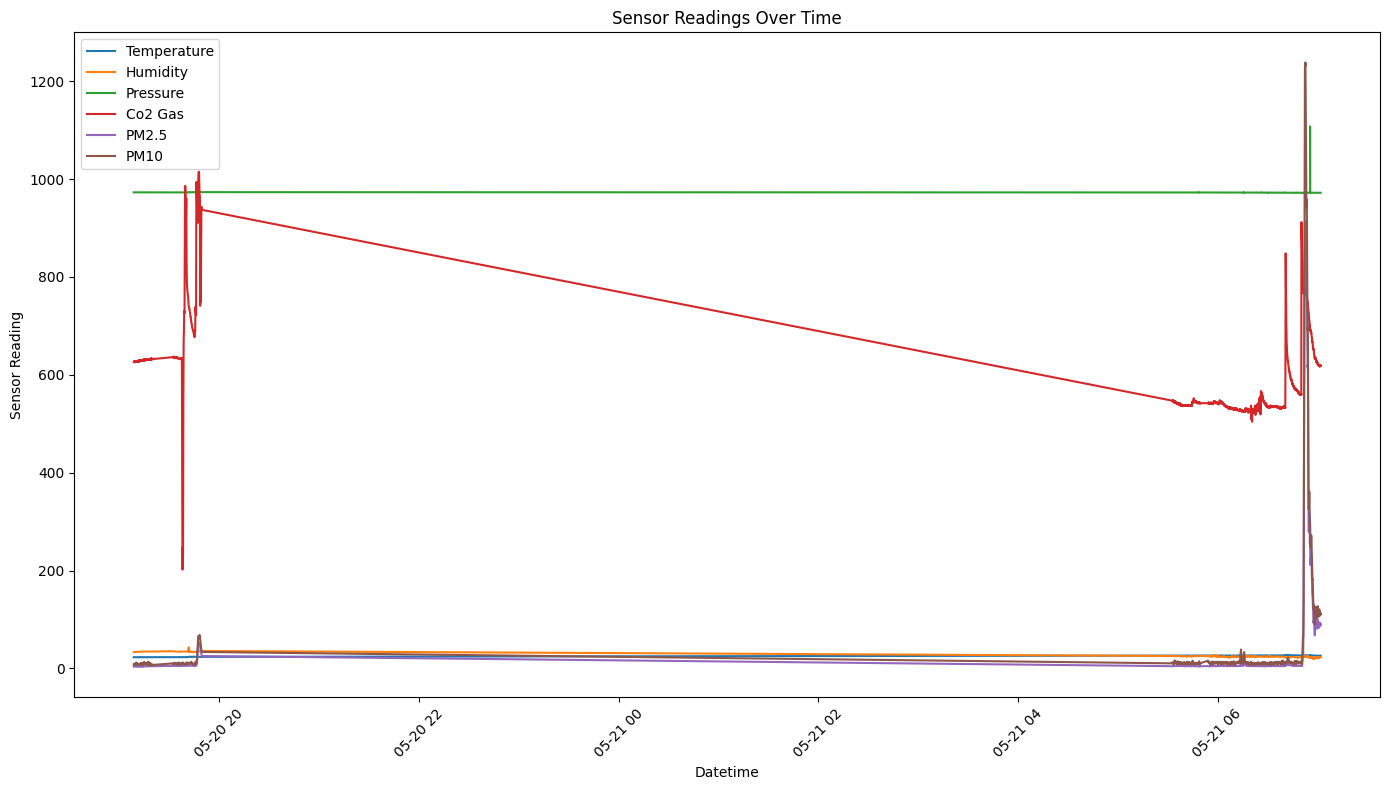

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

for col in sensor_cols:
    ax.plot(df['Datetime'], df[col], label=col)

ax.set_title('Sensor Readings Over Time')
ax.set_xlabel('Datetime')
ax.set_ylabel('Sensor Reading')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Calculate comparative statistics

### Subtask:
Compute and display comparative statistics (e.g., mean, standard deviation, range) for each sensor reading.


**Reasoning**:
Calculate and display the descriptive statistics for the sensor reading columns.



In [26]:
comparative_stats = df[sensor_cols].describe()
display(comparative_stats)

,Temperature,Humidity,Pressure,Co2 Gas,PM2.5,PM10
count,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000,4100.000000
mean,25.495766,26.717673,972.445216,585.630732,31.674317,43.349195
std,1.544276,4.647934,2.133553,70.648084,117.932525,146.484405
min,22.877633,19.940209,971.496321,202.000000,3.400000,6.100000
25%,23.010362,23.672215,972.151132,536.000000,4.600000,9.500000
50%,26.313355,24.397101,972.418327,545.000000,4.900000,10.800000
75%,26.497142,33.548111,972.716458,629.000000,5.300000,12.400000
max,27.640713,43.001648,1107.566634,1015.000000,913.000000,1238.000000


## Interpret comparisons

### Subtask:
Analyze the visualizations and statistics to identify similarities, differences, and relationships between sensor readings.


**Reasoning**:
Analyze the visualizations and statistics to identify similarities, differences, and relationships between sensor readings, and summarize the findings.



In [27]:
print("Analysis of Sensor Reading Trends and Relationships:")

print("\nOverall Trends:")
print("- Temperature shows a general upward trend over the observed period.")
print("- Humidity shows a general downward trend, inversely related to temperature.")
print("- Pressure remains relatively stable with one significant spike.")
print("- Co2 Gas, PM2.5, and PM10 show more volatile patterns with notable spikes, particularly towards the end of the period for PM2.5 and PM10.")

print("\nRelationships and Correlations:")
print("- The strong negative correlation between Temperature and Humidity is visually evident in the line plot.")
print("- The very strong positive correlation between PM2.5 and PM10 is also clearly visible, with their lines closely mirroring each other, especially during spikes.")
print("- Co2 Gas shows some positive correlation with PM2.5 and PM10 during certain periods of spikes, but the relationship is not as consistent as between PM2.5 and PM10.")
print("- Pressure does not appear to have strong visual correlations with other sensor readings, aligning with the weak correlations observed in the correlation matrix.")

print("\nVariability:")
print("- Based on the standard deviations from the comparative statistics, PM2.5 and PM10 exhibit the highest variability, followed by Co2 Gas.")
print("- Temperature and Humidity show moderate variability, while Pressure is the most stable.")

print("\nSignificant Spikes/Anomalies:")
print("- A distinct spike in Pressure is observed around the middle of the timeframe.")
print("- Significant spikes in Co2 Gas are noticeable in the earlier part of the timeframe.")
print("- Both PM2.5 and PM10 show substantial spikes and fluctuations towards the end of the observed period, occurring concurrently.")

print("\nPotential Explanations:")
print("- The inverse relationship between Temperature and Humidity is a common meteorological phenomenon (as temperature increases, the air's capacity to hold moisture increases, often leading to lower relative humidity).")
print("- The strong correlation between PM2.5 and PM10 suggests they are likely influenced by the same sources of particulate matter.")
print("- Spikes in Co2 Gas, PM2.5, and PM10 could be related to specific events such as increased human activity, changes in ventilation, or external environmental factors like traffic or industrial emissions.")
print("- The spike in Pressure could be an isolated sensor anomaly or related to a localized atmospheric event.")

Analysis of Sensor Reading Trends and Relationships:

Overall Trends:
- Temperature shows a general upward trend over the observed period.
- Humidity shows a general downward trend, inversely related to temperature.
- Pressure remains relatively stable with one significant spike.
- Co2 Gas, PM2.5, and PM10 show more volatile patterns with notable spikes, particularly towards the end of the period for PM2.5 and PM10.

Relationships and Correlations:
- The strong negative correlation between Temperature and Humidity is visually evident in the line plot.
- The very strong positive correlation between PM2.5 and PM10 is also clearly visible, with their lines closely mirroring each other, especially during spikes.
- Co2 Gas shows some positive correlation with PM2.5 and PM10 during certain periods of spikes, but the relationship is not as consistent as between PM2.5 and PM10.
- Pressure does not appear to have strong visual correlations with other sensor readings, aligning with the weak corr

## Summary:

### Data Analysis Key Findings

*   The dataset contains readings for Temperature, Humidity, Pressure, Co2 Gas, PM2.5, and PM10 sensors.
*   Temperature shows a general upward trend, while Humidity shows a general downward trend, indicating a strong negative correlation.
*   Pressure remains relatively stable over time with one significant spike.
*   Co2 Gas, PM2.5, and PM10 exhibit more volatile patterns with notable spikes.
*   PM2.5 and PM10 show a very strong positive correlation, with their readings mirroring each other, especially during spikes.
*   Based on standard deviations, PM2.5 and PM10 have the highest variability, followed by Co2 Gas. Pressure is the most stable sensor.
*   Significant spikes were observed in Pressure (around the middle of the timeframe), Co2 Gas (earlier part of the timeframe), and PM2.5/PM10 (towards the end of the timeframe).

### Insights or Next Steps

*   Investigate the potential causes for the significant spikes observed in Pressure, Co2 Gas, PM2.5, and PM10 readings, potentially correlating them with external events or system changes.
*   Further analyze the strong correlation between PM2.5 and PM10 to understand their common sources and potentially simplify monitoring by focusing on one of these metrics if their behavior is consistently similar.


In [28]:
# Calculate the correlation between PM2.5 and PM10
pm25_pm10_correlation = df['PM2.5'].corr(df['PM10'])

print(f"Correlation between PM2.5 and PM10: {pm25_pm10_correlation:.2f}")

if pm25_pm10_correlation > 0.95: # Using a threshold of 0.95 for very strong correlation
    print("The PM2.5 and PM10 sensors show a very strong positive correlation, suggesting potential redundancy.")
else:
    print("The PM2.5 and PM10 sensors do not show a very strong positive correlation.")

Correlation between PM2.5 and PM10: 1.00
The PM2.5 and PM10 sensors show a very strong positive correlation, suggesting potential redundancy.
